In \[1\]:

    # Data Visualisation
    # 1.0 Reset memory
    #%reset -f
    # 1.1 Call libraries

    ## A. Data manipulation
    import numpy as np
    import pandas as pd
    import os
    import matplotlib.pyplot as plt
    import seaborn as sns

    # 1.2 for data splitting
    from sklearn.model_selection import train_test_split

    ## B. Transformers for predictors:

    # 1.3 Class for imputing missing values
    # https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
    from sklearn.impute import SimpleImputer

    # 1.4 One hot encode categorical data--Convert to dummy
    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    from sklearn.preprocessing import OneHotEncoder as onehot

    # 1.5 Scale numeric data
    from sklearn.preprocessing import StandardScaler

    ## C. Transformer for target:

    # 1.6 Label encode target column
    from sklearn.preprocessing import LabelEncoder

    ## D. Composite Transformers:

    # 1.7 Class for applying multiple data transformation
    #     jobs parallely
    from sklearn.compose import ColumnTransformer

    # 1.8 Pipeline class: Class for applying multiple
    #     data transformations sequentially
    from sklearn.pipeline import Pipeline

    ## E. Estimator

    # 1.9 Estimator
    # Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    # User guide: https://scikit-learn.org/stable/modules/tree.html
    from sklearn.tree import DecisionTreeClassifier 

    # 1.10 To plot graphs and pipeline diagram
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn import set_config

# Read Data<a href="#Read-Data" class="anchor-link">¶</a>

In \[2\]:

    # read the dataset using the compression zip
    df=pd.read_csv("C:\\Users\\user\\Downloads\\archive (3)\\nba-players.csv")

In \[3\]:

    df.head()

Out\[3\]:

|     | Unnamed: 0 | name            | gp  | min  | pts | fgm | fga | fg   | 3p_made | 3pa | ... | fta | ft   | oreb | dreb | reb | ast | stl | blk | tov | target_5yrs |
|-----|------------|-----------------|-----|------|-----|-----|-----|------|---------|-----|-----|-----|------|------|------|-----|-----|-----|-----|-----|-------------|
| 0   | 0          | Brandon Ingram  | 36  | 27.4 | 7.4 | 2.6 | 7.6 | 34.7 | 0.5     | 2.1 | ... | 2.3 | 69.9 | 0.7  | 3.4  | 4.1 | 1.9 | 0.4 | 0.4 | 1.3 | 0           |
| 1   | 1          | Andrew Harrison | 35  | 26.9 | 7.2 | 2.0 | 6.7 | 29.6 | 0.7     | 2.8 | ... | 3.4 | 76.5 | 0.5  | 2.0  | 2.4 | 3.7 | 1.1 | 0.5 | 1.6 | 0           |
| 2   | 2          | JaKarr Sampson  | 74  | 15.3 | 5.2 | 2.0 | 4.7 | 42.2 | 0.4     | 1.7 | ... | 1.3 | 67.0 | 0.5  | 1.7  | 2.2 | 1.0 | 0.5 | 0.3 | 1.0 | 0           |
| 3   | 3          | Malik Sealy     | 58  | 11.6 | 5.7 | 2.3 | 5.5 | 42.6 | 0.1     | 0.5 | ... | 1.3 | 68.9 | 1.0  | 0.9  | 1.9 | 0.8 | 0.6 | 0.1 | 1.0 | 1           |
| 4   | 4          | Matt Geiger     | 48  | 11.5 | 4.5 | 1.6 | 3.0 | 52.4 | 0.0     | 0.1 | ... | 1.9 | 67.4 | 1.0  | 1.5  | 2.5 | 0.3 | 0.3 | 0.4 | 0.8 | 1           |

5 rows × 22 columns

In \[4\]:

    df = df.iloc[:, 1:]
    df

Out\[4\]:

|      | name            | gp  | min  | pts | fgm | fga | fg   | 3p_made | 3pa | 3p   | ... | fta | ft   | oreb | dreb | reb | ast | stl | blk | tov | target_5yrs |
|------|-----------------|-----|------|-----|-----|-----|------|---------|-----|------|-----|-----|------|------|------|-----|-----|-----|-----|-----|-------------|
| 0    | Brandon Ingram  | 36  | 27.4 | 7.4 | 2.6 | 7.6 | 34.7 | 0.5     | 2.1 | 25.0 | ... | 2.3 | 69.9 | 0.7  | 3.4  | 4.1 | 1.9 | 0.4 | 0.4 | 1.3 | 0           |
| 1    | Andrew Harrison | 35  | 26.9 | 7.2 | 2.0 | 6.7 | 29.6 | 0.7     | 2.8 | 23.5 | ... | 3.4 | 76.5 | 0.5  | 2.0  | 2.4 | 3.7 | 1.1 | 0.5 | 1.6 | 0           |
| 2    | JaKarr Sampson  | 74  | 15.3 | 5.2 | 2.0 | 4.7 | 42.2 | 0.4     | 1.7 | 24.4 | ... | 1.3 | 67.0 | 0.5  | 1.7  | 2.2 | 1.0 | 0.5 | 0.3 | 1.0 | 0           |
| 3    | Malik Sealy     | 58  | 11.6 | 5.7 | 2.3 | 5.5 | 42.6 | 0.1     | 0.5 | 22.6 | ... | 1.3 | 68.9 | 1.0  | 0.9  | 1.9 | 0.8 | 0.6 | 0.1 | 1.0 | 1           |
| 4    | Matt Geiger     | 48  | 11.5 | 4.5 | 1.6 | 3.0 | 52.4 | 0.0     | 0.1 | 0.0  | ... | 1.9 | 67.4 | 1.0  | 1.5  | 2.5 | 0.3 | 0.3 | 0.4 | 0.8 | 1           |
| ...  | ...             | ... | ...  | ... | ... | ... | ...  | ...     | ... | ...  | ... | ... | ...  | ...  | ...  | ... | ... | ... | ... | ... | ...         |
| 1335 | Chris Smith     | 80  | 15.8 | 4.3 | 1.6 | 3.6 | 43.3 | 0.0     | 0.2 | 14.3 | ... | 1.5 | 79.2 | 0.4  | 0.8  | 1.2 | 2.5 | 0.6 | 0.2 | 0.8 | 0           |
| 1336 | Brent Price     | 68  | 12.6 | 3.9 | 1.5 | 4.1 | 35.8 | 0.1     | 0.7 | 16.7 | ... | 1.0 | 79.4 | 0.4  | 1.1  | 1.5 | 2.3 | 0.8 | 0.0 | 1.3 | 1           |
| 1337 | Marlon Maxey    | 43  | 12.1 | 5.4 | 2.2 | 3.9 | 55.0 | 0.0     | 0.0 | 0.0  | ... | 1.6 | 64.3 | 1.5  | 2.3  | 3.8 | 0.3 | 0.3 | 0.4 | 0.9 | 0           |
| 1338 | Litterial Green | 52  | 12.0 | 4.5 | 1.7 | 3.8 | 43.9 | 0.0     | 0.2 | 10.0 | ... | 1.8 | 62.5 | 0.2  | 0.4  | 0.7 | 2.2 | 0.4 | 0.1 | 0.8 | 1           |
| 1339 | Jon Barry       | 47  | 11.7 | 4.4 | 1.6 | 4.4 | 36.9 | 0.4     | 1.3 | 33.3 | ... | 1.0 | 67.3 | 0.2  | 0.7  | 0.9 | 1.4 | 0.7 | 0.1 | 0.9 | 1           |

1340 rows × 21 columns

In \[5\]:

    #Checkin the size of data
    df.size

Out\[5\]:

    28140

# Data Exploration<a href="#Data-Exploration" class="anchor-link">¶</a>

In \[6\]:

    #Checking the dataset
    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1340 entries, 0 to 1339
    Data columns (total 21 columns):
     #   Column       Non-Null Count  Dtype  
    ---  ------       --------------  -----  
     0   name         1340 non-null   object 
     1   gp           1340 non-null   int64  
     2   min          1340 non-null   float64
     3   pts          1340 non-null   float64
     4   fgm          1340 non-null   float64
     5   fga          1340 non-null   float64
     6   fg           1340 non-null   float64
     7   3p_made      1340 non-null   float64
     8   3pa          1340 non-null   float64
     9   3p           1340 non-null   float64
     10  ftm          1340 non-null   float64
     11  fta          1340 non-null   float64
     12  ft           1340 non-null   float64
     13  oreb         1340 non-null   float64
     14  dreb         1340 non-null   float64
     15  reb          1340 non-null   float64
     16  ast          1340 non-null   float64
     17  stl          1340 non-null   float64
     18  blk          1340 non-null   float64
     19  tov          1340 non-null   float64
     20  target_5yrs  1340 non-null   int64  
    dtypes: float64(18), int64(2), object(1)
    memory usage: 220.0+ KB

In \[7\]:

    #Checkin the dtypes
    df.dtypes

Out\[7\]:

    name            object
    gp               int64
    min            float64
    pts            float64
    fgm            float64
    fga            float64
    fg             float64
    3p_made        float64
    3pa            float64
    3p             float64
    ftm            float64
    fta            float64
    ft             float64
    oreb           float64
    dreb           float64
    reb            float64
    ast            float64
    stl            float64
    blk            float64
    tov            float64
    target_5yrs      int64
    dtype: object

In \[8\]:

    #chekcing the number of rows and columns in the dataset
    df.shape

Out\[8\]:

    (1340, 21)

In \[9\]:

    pd.set_option('max_columns', None)

    s0 = round(df[df['target_5yrs'] == 0].describe(), 2)
    s1 = round(df[df['target_5yrs'] == 1].describe(), 2)

    pd.concat([s0, s1], axis = 1, keys = ['Less than 5 years', '5 years or more'])

Out\[9\]:

|       | Less than 5 years |        |        |        |        |        |         |        |        |        |        |        |        |        |        |        |        |        |        |             | 5 years or more |        |        |        |        |        |         |        |        |        |        |        |        |        |        |        |        |        |        |             |
|-------|-------------------|--------|--------|--------|--------|--------|---------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|-------------|-----------------|--------|--------|--------|--------|--------|---------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|-------------|
|       | gp                | min    | pts    | fgm    | fga    | fg     | 3p_made | 3pa    | 3p     | ftm    | fta    | ft     | oreb   | dreb   | reb    | ast    | stl    | blk    | tov    | target_5yrs | gp              | min    | pts    | fgm    | fga    | fg     | 3p_made | 3pa    | 3p     | ftm    | fta    | ft     | oreb   | dreb   | reb    | ast    | stl    | blk    | tov    | target_5yrs |
| count | 509.00            | 509.00 | 509.00 | 509.00 | 509.00 | 509.00 | 509.00  | 509.00 | 509.00 | 509.00 | 509.00 | 509.00 | 509.00 | 509.00 | 509.00 | 509.00 | 509.00 | 509.00 | 509.00 | 509.0       | 831.00          | 831.00 | 831.00 | 831.00 | 831.00 | 831.00 | 831.00  | 831.00 | 831.00 | 831.00 | 831.00 | 831.00 | 831.00 | 831.00 | 831.00 | 831.00 | 831.00 | 831.00 | 831.00 | 831.0       |
| mean  | 51.58             | 14.25  | 5.04   | 1.95   | 4.54   | 42.39  | 0.23    | 0.75   | 19.15  | 0.92   | 1.32   | 68.86  | 0.72   | 1.53   | 2.25   | 1.22   | 0.50   | 0.25   | 0.94   | 0.0         | 65.83           | 19.69  | 7.88   | 3.05   | 6.71   | 45.26  | 0.26    | 0.79   | 19.15  | 1.53   | 2.13   | 71.18  | 1.19   | 2.33   | 3.52   | 1.75   | 0.69   | 0.44   | 1.35   | 1.0         |
| std   | 16.99             | 6.57   | 3.11   | 1.21   | 2.61   | 6.68   | 0.32    | 0.93   | 15.32  | 0.68   | 0.91   | 11.39  | 0.55   | 1.02   | 1.48   | 1.10   | 0.32   | 0.29   | 0.55   | 0.0         | 15.38           | 8.58   | 4.65   | 1.79   | 3.86   | 5.51   | 0.42    | 1.14   | 16.49  | 1.07   | 1.44   | 9.95   | 0.84   | 1.45   | 2.21   | 1.62   | 0.44   | 0.48   | 0.77   | 0.0         |
| min   | 11.00             | 3.10   | 0.70   | 0.30   | 0.80   | 23.80  | 0.00    | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.00   | 0.20   | 0.30   | 0.00   | 0.00   | 0.00   | 0.10   | 0.0         | 16.00           | 4.40   | 1.00   | 0.40   | 0.80   | 29.20  | 0.00    | 0.00   | 0.00   | 0.10   | 0.10   | 28.60  | 0.10   | 0.30   | 0.40   | 0.00   | 0.00   | 0.00   | 0.10   | 1.0         |
| 25%   | 39.00             | 9.40   | 3.10   | 1.20   | 2.80   | 38.00  | 0.00    | 0.10   | 0.00   | 0.50   | 0.70   | 63.00  | 0.30   | 0.80   | 1.20   | 0.50   | 0.30   | 0.10   | 0.60   | 0.0         | 54.50           | 12.60  | 4.50   | 1.70   | 3.80   | 41.60  | 0.00    | 0.00   | 0.00   | 0.80   | 1.10   | 65.90  | 0.50   | 1.30   | 1.90   | 0.70   | 0.40   | 0.10   | 0.80   | 1.0         |
| 50%   | 51.00             | 12.80  | 4.10   | 1.60   | 3.90   | 41.80  | 0.10    | 0.30   | 22.70  | 0.80   | 1.10   | 69.80  | 0.60   | 1.20   | 1.80   | 0.90   | 0.40   | 0.20   | 0.80   | 0.0         | 71.00           | 18.70  | 6.80   | 2.60   | 5.70   | 45.10  | 0.00    | 0.20   | 22.20  | 1.20   | 1.80   | 71.90  | 1.00   | 2.00   | 3.00   | 1.20   | 0.60   | 0.30   | 1.20   | 1.0         |
| 75%   | 64.00             | 17.60  | 6.10   | 2.50   | 5.40   | 46.20  | 0.40    | 1.20   | 31.50  | 1.10   | 1.70   | 76.40  | 0.90   | 2.00   | 2.90   | 1.60   | 0.60   | 0.30   | 1.20   | 0.0         | 79.00           | 25.75  | 10.10  | 3.90   | 8.60   | 48.60  | 0.40    | 1.10   | 33.00  | 1.90   | 2.70   | 78.10  | 1.60   | 3.10   | 4.60   | 2.30   | 0.90   | 0.60   | 1.70   | 1.0         |
| max   | 82.00             | 37.20  | 21.90  | 8.00   | 17.60  | 65.90  | 1.60    | 4.80   | 100.00 | 5.00   | 6.20   | 100.00 | 3.90   | 7.70   | 11.00  | 8.70   | 2.10   | 2.10   | 3.90   | 0.0         | 82.00           | 40.90  | 28.20  | 10.20  | 19.80  | 73.70  | 2.30    | 6.50   | 100.00 | 7.70   | 10.20  | 100.00 | 5.30   | 9.60   | 13.90  | 10.60  | 2.50   | 3.90   | 4.40   | 1.0         |

In \[10\]:

    def count_negatives(data):
        neg_count = 0
        for n in data:
            if type(data) == 'int':
                if n < 0:
                   neg_count += 1
        return neg_count

    count_negatives(df)

Out\[10\]:

    0

In \[11\]:

    colors = ['#14294F', '#11585D', '#D4A485', '#9C3025']
    palette = sns.color_palette(palette = colors)

    sns.palplot(palette, size = 3)

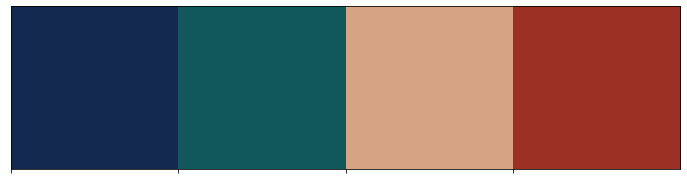

In \[12\]:

    #Dropping Duplicates
    df = df.drop_duplicates(subset = 'name', keep = 'last')
    df
    df=df.reset_index()

In \[13\]:

    df

Out\[13\]:

|      | index | name            | gp  | min  | pts | fgm | fga | fg   | 3p_made | 3pa | 3p   | ftm | fta | ft   | oreb | dreb | reb | ast | stl | blk | tov | target_5yrs |
|------|-------|-----------------|-----|------|-----|-----|-----|------|---------|-----|------|-----|-----|------|------|------|-----|-----|-----|-----|-----|-------------|
| 0    | 0     | Brandon Ingram  | 36  | 27.4 | 7.4 | 2.6 | 7.6 | 34.7 | 0.5     | 2.1 | 25.0 | 1.6 | 2.3 | 69.9 | 0.7  | 3.4  | 4.1 | 1.9 | 0.4 | 0.4 | 1.3 | 0           |
| 1    | 1     | Andrew Harrison | 35  | 26.9 | 7.2 | 2.0 | 6.7 | 29.6 | 0.7     | 2.8 | 23.5 | 2.6 | 3.4 | 76.5 | 0.5  | 2.0  | 2.4 | 3.7 | 1.1 | 0.5 | 1.6 | 0           |
| 2    | 2     | JaKarr Sampson  | 74  | 15.3 | 5.2 | 2.0 | 4.7 | 42.2 | 0.4     | 1.7 | 24.4 | 0.9 | 1.3 | 67.0 | 0.5  | 1.7  | 2.2 | 1.0 | 0.5 | 0.3 | 1.0 | 0           |
| 3    | 3     | Malik Sealy     | 58  | 11.6 | 5.7 | 2.3 | 5.5 | 42.6 | 0.1     | 0.5 | 22.6 | 0.9 | 1.3 | 68.9 | 1.0  | 0.9  | 1.9 | 0.8 | 0.6 | 0.1 | 1.0 | 1           |
| 4    | 4     | Matt Geiger     | 48  | 11.5 | 4.5 | 1.6 | 3.0 | 52.4 | 0.0     | 0.1 | 0.0  | 1.3 | 1.9 | 67.4 | 1.0  | 1.5  | 2.5 | 0.3 | 0.3 | 0.4 | 0.8 | 1           |
| ...  | ...   | ...             | ... | ...  | ... | ... | ... | ...  | ...     | ... | ...  | ... | ... | ...  | ...  | ...  | ... | ... | ... | ... | ... | ...         |
| 1289 | 1335  | Chris Smith     | 80  | 15.8 | 4.3 | 1.6 | 3.6 | 43.3 | 0.0     | 0.2 | 14.3 | 1.2 | 1.5 | 79.2 | 0.4  | 0.8  | 1.2 | 2.5 | 0.6 | 0.2 | 0.8 | 0           |
| 1290 | 1336  | Brent Price     | 68  | 12.6 | 3.9 | 1.5 | 4.1 | 35.8 | 0.1     | 0.7 | 16.7 | 0.8 | 1.0 | 79.4 | 0.4  | 1.1  | 1.5 | 2.3 | 0.8 | 0.0 | 1.3 | 1           |
| 1291 | 1337  | Marlon Maxey    | 43  | 12.1 | 5.4 | 2.2 | 3.9 | 55.0 | 0.0     | 0.0 | 0.0  | 1.0 | 1.6 | 64.3 | 1.5  | 2.3  | 3.8 | 0.3 | 0.3 | 0.4 | 0.9 | 0           |
| 1292 | 1338  | Litterial Green | 52  | 12.0 | 4.5 | 1.7 | 3.8 | 43.9 | 0.0     | 0.2 | 10.0 | 1.2 | 1.8 | 62.5 | 0.2  | 0.4  | 0.7 | 2.2 | 0.4 | 0.1 | 0.8 | 1           |
| 1293 | 1339  | Jon Barry       | 47  | 11.7 | 4.4 | 1.6 | 4.4 | 36.9 | 0.4     | 1.3 | 33.3 | 0.7 | 1.0 | 67.3 | 0.2  | 0.7  | 0.9 | 1.4 | 0.7 | 0.1 | 0.9 | 1           |

1294 rows × 22 columns

In \[14\]:

    #Arranging in Ascending order
    high_scorers = df[(df['min'] > 35) & (df['pts'] > 20)].copy()
    high_scorers.sort_values(by = 'pts', ascending = False)

Out\[14\]:

|      | index | name               | gp  | min  | pts  | fgm  | fga  | fg   | 3p_made | 3pa | 3p   | ftm | fta  | ft   | oreb | dreb | reb  | ast | stl | blk | tov | target_5yrs |
|------|-------|--------------------|-----|------|------|------|------|------|---------|-----|------|-----|------|------|------|------|------|-----|-----|-----|-----|-------------|
| 327  | 352   | Michael Jordan\*   | 82  | 38.3 | 28.2 | 10.2 | 19.8 | 51.5 | 0.1     | 0.6 | 17.3 | 7.7 | 9.1  | 84.5 | 2.0  | 4.5  | 6.5  | 5.9 | 2.4 | 0.8 | 3.5 | 1           |
| 114  | 118   | David Robinson\*   | 82  | 36.6 | 24.3 | 8.4  | 15.9 | 53.1 | 0.0     | 0.0 | 0.0  | 7.5 | 10.2 | 73.2 | 3.7  | 8.3  | 12.0 | 2.0 | 1.7 | 3.9 | 3.1 | 1           |
| 412  | 442   | Terry Cummings     | 70  | 36.2 | 23.7 | 9.8  | 18.7 | 52.3 | 0.0     | 0.0 | 0.0  | 4.2 | 5.9  | 70.9 | 4.3  | 6.3  | 10.6 | 2.5 | 1.8 | 0.9 | 2.9 | 1           |
| 1113 | 1157  | Allen Iverson\*    | 76  | 40.1 | 23.5 | 8.2  | 19.8 | 41.6 | 2.0     | 6.0 | 34.1 | 5.0 | 7.2  | 70.2 | 1.5  | 2.6  | 4.1  | 7.5 | 2.1 | 0.3 | 4.4 | 1           |
| 1263 | 1308  | Shaquille O'Neal\* | 81  | 37.9 | 23.4 | 9.0  | 16.1 | 56.2 | 0.0     | 0.0 | 0.0  | 5.3 | 8.9  | 59.2 | 4.2  | 9.6  | 13.9 | 1.9 | 0.7 | 3.5 | 3.8 | 1           |
| 249  | 272   | Ron Harper         | 82  | 37.4 | 22.9 | 9.0  | 19.7 | 45.5 | 0.2     | 1.1 | 21.3 | 4.7 | 6.9  | 68.4 | 2.1  | 2.7  | 4.8  | 4.8 | 2.5 | 1.0 | 4.2 | 1           |
| 631  | 666   | Blake Griffin      | 82  | 38.0 | 22.5 | 8.5  | 16.8 | 50.6 | 0.1     | 0.3 | 29.2 | 5.4 | 8.5  | 64.2 | 3.3  | 8.8  | 12.1 | 3.8 | 0.8 | 0.6 | 2.7 | 1           |
| 1185 | 1230  | Glenn Robinson     | 80  | 37.0 | 21.9 | 8.0  | 17.6 | 45.1 | 1.1     | 3.4 | 32.1 | 5.0 | 6.2  | 79.6 | 2.1  | 4.3  | 6.4  | 2.5 | 1.4 | 0.3 | 3.9 | 1           |
| 458  | 490   | Kelly Tripucka     | 82  | 37.5 | 21.6 | 7.8  | 15.6 | 49.6 | 0.1     | 0.3 | 22.7 | 6.0 | 7.6  | 79.7 | 2.7  | 2.7  | 5.4  | 3.3 | 1.1 | 0.2 | 3.4 | 1           |
| 881  | 921   | Carmelo Anthony    | 82  | 36.5 | 21.0 | 7.6  | 17.9 | 42.6 | 0.8     | 2.6 | 32.2 | 5.0 | 6.4  | 77.7 | 2.2  | 3.8  | 6.1  | 2.8 | 1.2 | 0.5 | 3.0 | 1           |
| 880  | 920   | LeBron James       | 79  | 39.5 | 20.9 | 7.9  | 18.9 | 41.7 | 0.8     | 2.7 | 29.0 | 4.4 | 5.8  | 75.4 | 1.3  | 4.2  | 5.5  | 5.9 | 1.6 | 0.7 | 3.5 | 1           |
| 504  | 537   | Darrell Griffith   | 81  | 35.4 | 20.6 | 8.8  | 19.1 | 46.4 | 0.1     | 0.6 | 19.2 | 2.8 | 4.0  | 71.6 | 1.0  | 2.6  | 3.6  | 2.4 | 1.3 | 0.5 | 2.9 | 1           |
| 662  | 697   | Tyreke Evans       | 72  | 37.2 | 20.1 | 7.4  | 16.2 | 45.8 | 0.5     | 2.0 | 25.5 | 4.8 | 6.5  | 74.8 | 0.9  | 4.4  | 5.3  | 5.8 | 1.5 | 0.4 | 3.0 | 1           |
| 1013 | 1055  | Elton Brand        | 81  | 37.0 | 20.1 | 7.8  | 16.1 | 48.2 | 0.0     | 0.0 | 0.0  | 4.5 | 6.6  | 68.5 | 4.3  | 5.7  | 10.0 | 1.9 | 0.8 | 1.6 | 2.8 | 1           |

In \[15\]:

    #To print number of null values in each column/feature
    df.isnull().sum()

Out\[15\]:

    index          0
    name           0
    gp             0
    min            0
    pts            0
    fgm            0
    fga            0
    fg             0
    3p_made        0
    3pa            0
    3p             0
    ftm            0
    fta            0
    ft             0
    oreb           0
    dreb           0
    reb            0
    ast            0
    stl            0
    blk            0
    tov            0
    target_5yrs    0
    dtype: int64

# Visualization<a href="#Visualization" class="anchor-link">¶</a>

In \[16\]:

    fig, ax = plt.subplots(figsize=(12,8))

    sns.scatterplot(
        data = df,
        x = 'min',
        y = 'pts',
        color = '#11585D',
        alpha = 0.5
    )

    sns.scatterplot(
        data = high_scorers,
        x = 'min',
        y = 'pts',
        color = '#9C3025'
    )

Out\[16\]:

    <AxesSubplot:xlabel='min', ylabel='pts'>

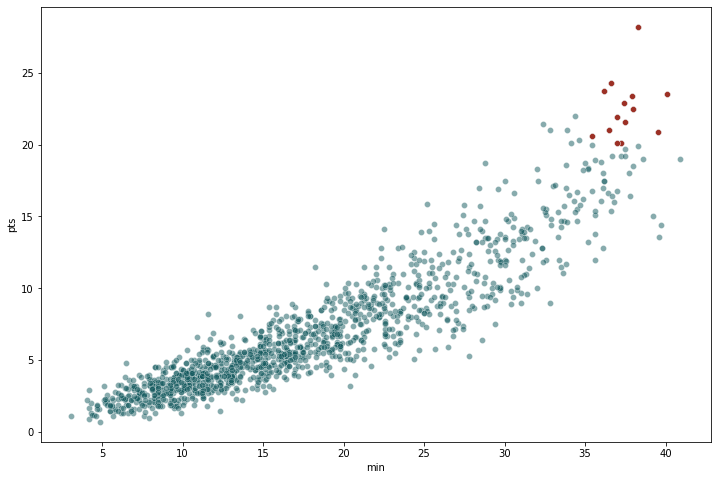

In \[17\]:

    fig, ax = plt.subplots(figsize=(10,6))

    sns.kdeplot(
        df['fga'][df['target_5yrs'] == 0],
        color = '#11585D',
        alpha = 0.5,
        shade = True,
        linewidth = 2,
        ec = 'black'
    )

    sns.kdeplot(
        df['fga'][df['target_5yrs'] == 1],
        color = '#9C3025',
        alpha = 0.5,
        shade = True,
        linewidth = 2,
        ec = 'black'
    )

    for i in ['top', 'left', 'bottom', 'right']:
        ax.spines[i].set_visible(False)

    ax.set_xlabel
    ax.legend(['Less than 5 yrs', '5 yrs or more'])
    ax.set_xlabel('Field Goals Attempted', labelpad = 15)

Out\[17\]:

    Text(0.5, 0, 'Field Goals Attempted')

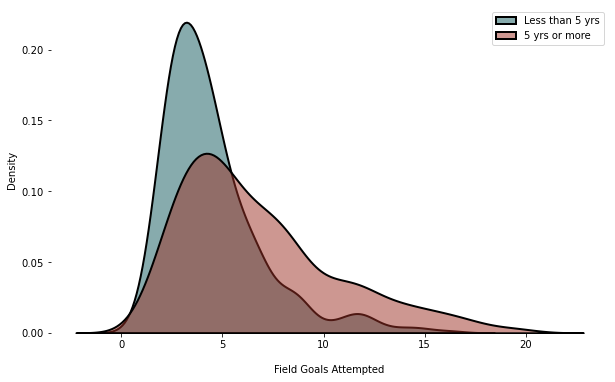

In \[18\]:

    fig, ax = plt.subplots(figsize=(10,6))


    labels = ["5+ years", "Less than 5 years"]
    colors = ['#11585D', '#D4A485']
    sizes = df['target_5yrs'].value_counts()

    plt.pie(sizes, explode = [0, 0.05], labels = labels, colors = colors,
            autopct = '%1.0f%%', shadow = True, wedgeprops = {'ec': 'black'},
            textprops = {'fontsize': 12}
    )

    plt.axis('equal')

Out\[18\]:

    (-1.1136927095292068,
     1.120255942754404,
     -1.169824339417784,
     1.1155262628705853)

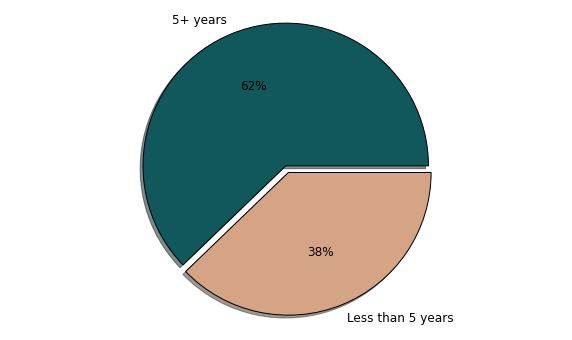

In \[19\]:

    x = df.drop(['name', 'target_5yrs'], axis = 1)
    y = df['target_5yrs']

In \[20\]:

    x.columns

Out\[20\]:

    Index(['index', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p',
           'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov'],
          dtype='object')

# Data Pre processing and cleaning<a href="#Data-Pre-processing-and-cleaning" class="anchor-link">¶</a>

In \[21\]:

    count_unique_values = df.nunique().sort_values()

    #find features that have constant values only
    #such features do not provide any information and only make our dataset larger.
    constantfeatures = [features for features in df.columns if count_unique_values[features] == 1]

    print("Number of Constant features are:")
    print(len(constantfeatures)) 

    # Removing features with constant values
    df.drop(constantfeatures, axis=1, inplace=True)

    Number of Constant features are:
    0

In \[22\]:

    # Understanding which features are catagorical and which are numerical based on datatype for imputation
    catagorical_features = df.select_dtypes(include=[np.object]).columns 
    numerical_features = df.select_dtypes(include=[np.number]).columns

    <ipython-input-22-72f57e285ea9>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
    Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
      catagorical_features = df.select_dtypes(include=[np.object]).columns

In \[23\]:

    # Total number of categorical features in the dataset
    len(catagorical_features)

Out\[23\]:

    1

In \[24\]:

    # Total number of numerical features in the dataset
    len(numerical_features)

Out\[24\]:

    21

In \[25\]:

    #To print unique values of catagorical featured (object data type)
    for feature in catagorical_features:
        print('\n ')
        print('*************','Column name:',feature,'*************')
        print('Number of Unique values:',df[feature].nunique())
        print('Unique Values:',df[feature].unique())

     
    ************* Column name: name *************
    Number of Unique values: 1294
    Unique Values: ['Brandon Ingram' 'Andrew Harrison' 'JaKarr Sampson' ... 'Marlon Maxey'
     'Litterial Green' 'Jon Barry']

In \[26\]:

    # missing values in %
    percent_miss = 100* df.isnull().sum()/len(df)
    percent_miss

Out\[26\]:

    index          0.0
    name           0.0
    gp             0.0
    min            0.0
    pts            0.0
    fgm            0.0
    fga            0.0
    fg             0.0
    3p_made        0.0
    3pa            0.0
    3p             0.0
    ftm            0.0
    fta            0.0
    ft             0.0
    oreb           0.0
    dreb           0.0
    reb            0.0
    ast            0.0
    stl            0.0
    blk            0.0
    tov            0.0
    target_5yrs    0.0
    dtype: float64

In \[27\]:

    # Calculating how many features have more than 50% of data missing in them
    np.sum(percent_miss > 50)

Out\[27\]:

    0

In \[28\]:

    # Remove these 24 features,as these have more than 50% data missing
    missing = [feature for feature in df.columns if percent_miss[feature] > 50]
    df.drop(missing, axis=1, inplace=True)

In \[29\]:

    # The updated data structure
    df.shape

Out\[29\]:

    (1294, 22)

In \[30\]:

    remove_missing_features = [feature for feature in df.columns if percent_miss[feature] < 0.5]
    fill_missing_features = [feature for feature in df.columns if percent_miss[feature] > 0.5] 

In \[31\]:

    # filling in the missing data for features containing many of them
    for col in fill_missing_features:
        if col in catagorical_features:
            # For catagorical feature fill missing data with mode
            df[col].fillna(df[col].mode(), inplace=True)
        else:
            # fill missing data with mean
            df[col].fillna(df[col].mean(), inplace=True)

    # removing rows with less than 0.5% missing data in them (only a few examples will be deleted )
    df.dropna(axis=0, inplace=True)

In \[32\]:

    df.shape

Out\[32\]:

    (1294, 22)

In \[33\]:

    df.isnull().sum()

Out\[33\]:

    index          0
    name           0
    gp             0
    min            0
    pts            0
    fgm            0
    fga            0
    fg             0
    3p_made        0
    3pa            0
    3p             0
    ftm            0
    fta            0
    ft             0
    oreb           0
    dreb           0
    reb            0
    ast            0
    stl            0
    blk            0
    tov            0
    target_5yrs    0
    dtype: int64

In \[34\]:

    corr=df.corr()
    corr['target_5yrs'].sort_values(ascending=False).head(10)

Out\[34\]:

    target_5yrs    1.000000
    gp             0.417127
    fgm            0.333778
    min            0.333133
    pts            0.332778
    ftm            0.316812
    fta            0.315725
    reb            0.313329
    fga            0.306871
    oreb           0.305815
    Name: target_5yrs, dtype: float64

In \[35\]:

    # Check for any duplicate columns created
    df.columns.duplicated().sum()

Out\[35\]:

    0

In \[36\]:

    #CORRELATION
    plt.figure(figsize=(25,18))
    _=sns.heatmap(df.corr('pearson'),annot=True,cmap='RdPu');
    plt.title('Pearson correlation')
    plt.tight_layout()

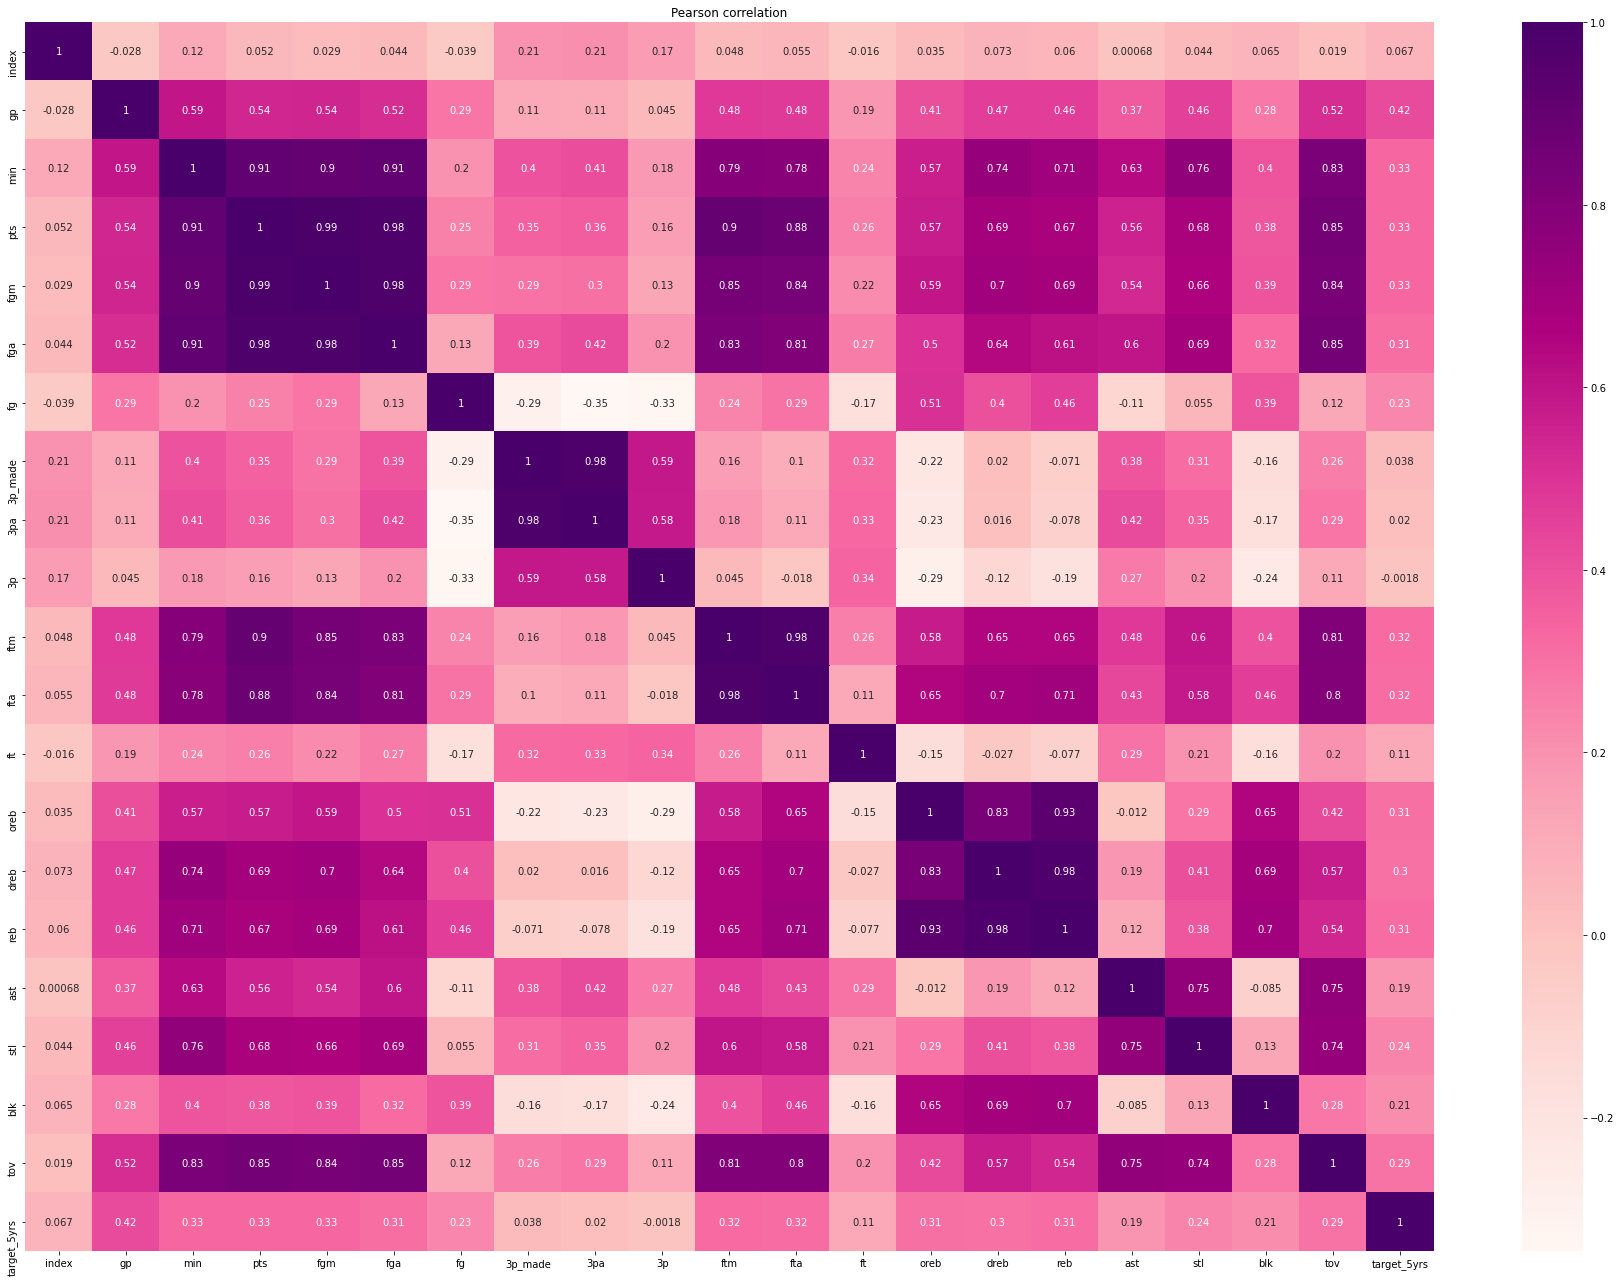

In \[37\]:

    def plots(p,predict,train,xlabel):
        plt.plot(p,predict,'g')
        plt.plot(p,train,'b')
        plt.title('Variation of Accuracy')
        plt.xlabel(xlabel)
        plt.ylabel('Accuracy')
        plt.legend(('Test','Train'))

In \[38\]:

    print(round(df.target_5yrs.value_counts() *100/ df.target_5yrs.count(),2))

    1    62.21
    0    37.79
    Name: target_5yrs, dtype: float64

In \[39\]:

    cat_col = df.select_dtypes(include=[np.object]).columns
    num_col = ['gp','min','pts','fgm','fga','fg','3p_made','3pa','3p','ftm','fta','oreb','dreb','reb','ast','stl','blk','tov','target_5yrs']

    <ipython-input-39-59e8567498ce>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
    Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
      cat_col = df.select_dtypes(include=[np.object]).columns

# Feature Eng<a href="#Feature-Eng" class="anchor-link">¶</a>

In \[40\]:

    # Create pipe for both numerical as also categorical data
    from sklearn.preprocessing import StandardScaler as ss

    nc_pipe = Pipeline([ ('impute', SimpleImputer(strategy = 'median')), ('ss',ss() )])
    cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), ('ohe', onehot())])

In \[41\]:

    # Test each pipe
    nc_pipe.fit_transform(df[num_col])
    cat_pipe.fit_transform(df[cat_col])

Out\[41\]:

    <1294x1294 sparse matrix of type '<class 'numpy.float64'>'
        with 1294 stored elements in Compressed Sparse Row format>

In \[42\]:

    #Now put the two pipes within one column-transformer
    ct = ColumnTransformer(
                            [
                            ('nc_pipe',nc_pipe,num_col), 
                            ('cat_pipe',cat_pipe,cat_col)
                            ]
                           )

In \[43\]:

    # Test this column transformer pipe
    ct.fit_transform(df)

Out\[43\]:

    <1294x1313 sparse matrix of type '<class 'numpy.float64'>'
        with 25880 stored elements in Compressed Sparse Row format>

In \[44\]:

    # Final pipe to bring in the column-transformer followed by estimator
    pt = Pipeline([ 
                    ('ct',ct), 
                    ('classifier', DecisionTreeClassifier())])

In \[45\]:

    # Your train data
    y_train = df.target_5yrs
    X_train = df.drop('target_5yrs', axis=1)

In \[46\]:

    y_train.head()

Out\[46\]:

    0    0
    1    0
    2    0
    3    1
    4    1
    Name: target_5yrs, dtype: int64

In \[47\]:

    X_train

Out\[47\]:

|      | index | name            | gp  | min  | pts | fgm | fga | fg   | 3p_made | 3pa | 3p   | ftm | fta | ft   | oreb | dreb | reb | ast | stl | blk | tov |
|------|-------|-----------------|-----|------|-----|-----|-----|------|---------|-----|------|-----|-----|------|------|------|-----|-----|-----|-----|-----|
| 0    | 0     | Brandon Ingram  | 36  | 27.4 | 7.4 | 2.6 | 7.6 | 34.7 | 0.5     | 2.1 | 25.0 | 1.6 | 2.3 | 69.9 | 0.7  | 3.4  | 4.1 | 1.9 | 0.4 | 0.4 | 1.3 |
| 1    | 1     | Andrew Harrison | 35  | 26.9 | 7.2 | 2.0 | 6.7 | 29.6 | 0.7     | 2.8 | 23.5 | 2.6 | 3.4 | 76.5 | 0.5  | 2.0  | 2.4 | 3.7 | 1.1 | 0.5 | 1.6 |
| 2    | 2     | JaKarr Sampson  | 74  | 15.3 | 5.2 | 2.0 | 4.7 | 42.2 | 0.4     | 1.7 | 24.4 | 0.9 | 1.3 | 67.0 | 0.5  | 1.7  | 2.2 | 1.0 | 0.5 | 0.3 | 1.0 |
| 3    | 3     | Malik Sealy     | 58  | 11.6 | 5.7 | 2.3 | 5.5 | 42.6 | 0.1     | 0.5 | 22.6 | 0.9 | 1.3 | 68.9 | 1.0  | 0.9  | 1.9 | 0.8 | 0.6 | 0.1 | 1.0 |
| 4    | 4     | Matt Geiger     | 48  | 11.5 | 4.5 | 1.6 | 3.0 | 52.4 | 0.0     | 0.1 | 0.0  | 1.3 | 1.9 | 67.4 | 1.0  | 1.5  | 2.5 | 0.3 | 0.3 | 0.4 | 0.8 |
| ...  | ...   | ...             | ... | ...  | ... | ... | ... | ...  | ...     | ... | ...  | ... | ... | ...  | ...  | ...  | ... | ... | ... | ... | ... |
| 1289 | 1335  | Chris Smith     | 80  | 15.8 | 4.3 | 1.6 | 3.6 | 43.3 | 0.0     | 0.2 | 14.3 | 1.2 | 1.5 | 79.2 | 0.4  | 0.8  | 1.2 | 2.5 | 0.6 | 0.2 | 0.8 |
| 1290 | 1336  | Brent Price     | 68  | 12.6 | 3.9 | 1.5 | 4.1 | 35.8 | 0.1     | 0.7 | 16.7 | 0.8 | 1.0 | 79.4 | 0.4  | 1.1  | 1.5 | 2.3 | 0.8 | 0.0 | 1.3 |
| 1291 | 1337  | Marlon Maxey    | 43  | 12.1 | 5.4 | 2.2 | 3.9 | 55.0 | 0.0     | 0.0 | 0.0  | 1.0 | 1.6 | 64.3 | 1.5  | 2.3  | 3.8 | 0.3 | 0.3 | 0.4 | 0.9 |
| 1292 | 1338  | Litterial Green | 52  | 12.0 | 4.5 | 1.7 | 3.8 | 43.9 | 0.0     | 0.2 | 10.0 | 1.2 | 1.8 | 62.5 | 0.2  | 0.4  | 0.7 | 2.2 | 0.4 | 0.1 | 0.8 |
| 1293 | 1339  | Jon Barry       | 47  | 11.7 | 4.4 | 1.6 | 4.4 | 36.9 | 0.4     | 1.3 | 33.3 | 0.7 | 1.0 | 67.3 | 0.2  | 0.7  | 0.9 | 1.4 | 0.7 | 0.1 | 0.9 |

1294 rows × 21 columns

In \[52\]:

    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()

In \[60\]:

    X_train.name=le.fit_transform(X_train.name)

In \[96\]:

    df.name=X_train.name

In \[97\]:

    num_data = df.select_dtypes(include = ['float64', 'int64']).copy()
    num_data.head()
    num_data.shape       # (1000, 11)
    num_data.columns

Out\[97\]:

|     | index | name  | gp  | min  | pts | fgm | fga | fg   | 3p_made | 3pa | 3p   | ftm | fta | ft   | oreb | dreb | reb | ast | stl | blk | tov | target_5yrs |
|-----|-------|-------|-----|------|-----|-----|-----|------|---------|-----|------|-----|-----|------|------|------|-----|-----|-----|-----|-----|-------------|
| 0   | 0     | 128.0 | 36  | 27.4 | 7.4 | 2.6 | 7.6 | 34.7 | 0.5     | 2.1 | 25.0 | 1.6 | 2.3 | 69.9 | 0.7  | 3.4  | 4.1 | 1.9 | 0.4 | 0.4 | 1.3 | 0           |
| 1   | 1     | 45.0  | 35  | 26.9 | 7.2 | 2.0 | 6.7 | 29.6 | 0.7     | 2.8 | 23.5 | 2.6 | 3.4 | 76.5 | 0.5  | 2.0  | 2.4 | 3.7 | 1.1 | 0.5 | 1.6 | 0           |
| 2   | 2     | 521.0 | 74  | 15.3 | 5.2 | 2.0 | 4.7 | 42.2 | 0.4     | 1.7 | 24.4 | 0.9 | 1.3 | 67.0 | 0.5  | 1.7  | 2.2 | 1.0 | 0.5 | 0.3 | 1.0 | 0           |
| 3   | 3     | 820.0 | 58  | 11.6 | 5.7 | 2.3 | 5.5 | 42.6 | 0.1     | 0.5 | 22.6 | 0.9 | 1.3 | 68.9 | 1.0  | 0.9  | 1.9 | 0.8 | 0.6 | 0.1 | 1.0 | 1           |
| 4   | 4     | 871.0 | 48  | 11.5 | 4.5 | 1.6 | 3.0 | 52.4 | 0.0     | 0.1 | 0.0  | 1.3 | 1.9 | 67.4 | 1.0  | 1.5  | 2.5 | 0.3 | 0.3 | 0.4 | 0.8 | 1           |

Out\[97\]:

    (1294, 22)

Out\[97\]:

    Index(['index', 'name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
           '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
           'blk', 'tov', 'target_5yrs'],
          dtype='object')

In \[113\]:

    num_data1=num_data.drop(['name','index'],axis=1)

In \[114\]:

    #  Columns in num_data that are either discrete (with few levels)
    #     or numeric

    cols=['name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
           '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
           'blk', 'tov', 'target_5yrs']

In \[115\]:

    # Create an instance of StandardScaler object
    ss= StandardScaler()

In \[118\]:

    #  Use fit and transform method
    nc = ss.fit_transform(num_data.loc[:,cols])

In \[138\]:

    nc.name=num_data.name
    nc.target_5yrs=num_data.target_5yrs

In \[139\]:

    # Transform numpy array back to pandas dataframe
    #        as we will be using pandas plotting functions

    nc = pd.DataFrame(nc, columns = cols)
    nc.head(2)

Out\[139\]:

|     | name  | gp        | min      | pts      | fgm       | fga      | fg        | 3p_made  | 3pa      | 3p       | ftm      | fta      | ft        | oreb      | dreb      | reb       | ast      | stl       | blk      | tov      | target_5yrs |
|-----|-------|-----------|----------|----------|-----------|----------|-----------|----------|----------|----------|----------|----------|-----------|-----------|-----------|-----------|----------|-----------|----------|----------|-------------|
| 0   | 128.0 | -1.401161 | 1.181247 | 0.140627 | -0.014714 | 0.480467 | -1.542302 | 0.642382 | 1.226632 | 0.349843 | 0.314634 | 0.370179 | -0.040085 | -0.396623 | 1.020705  | 0.526669  | 0.242641 | -0.528794 | 0.072036 | 0.154080 | 0           |
| 1   | 45.0  | -1.458641 | 1.120921 | 0.094529 | -0.372838 | 0.229040 | -2.375125 | 1.159162 | 1.881019 | 0.256753 | 1.333493 | 1.205885 | 0.584848  | -0.656223 | -0.015501 | -0.306592 | 1.466988 | 1.177590  | 0.303911 | 0.570031 | 0           |

In \[140\]:

    #
    nc.shape     # (1000,9)

Out\[140\]:

    (1294, 21)

In \[141\]:

    # 4.0 Also create a dataframe from random data
    #      for comparison:

    rng = np.random.default_rng()
    nc_rand = pd.DataFrame(rng.normal(size = (1000,21)),
                           columns = cols    # Assign column names, just like that
                           )

In \[156\]:

    # Add/overwrite these columns also
    #
    nc_rand['name'] = np.random.randint(1339,   size= (1000,))   # [0,1]
    nc_rand['target_5yrs']        = np.random.randint(2,   size= (1000,))   # [0,1]

    nc_rand.shape    # (1000,11)

Out\[156\]:

    (1000, 25)

## Parallel coordinates plot<a href="#Parallel-coordinates-plot" class="anchor-link">¶</a>

In \[157\]:

    # 5.0   Now start plotting
    #        https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html

In \[164\]:

    # 5.1 Parallel coordinates with random data

    fig1 = plt.figure()
    pd.plotting.parallel_coordinates(nc_rand.drop('name',axis=1),
                                     'target_5yrs',    # class_column
                                      colormap='winter'
                                      )
    plt.xticks(rotation=90)
    plt.title("Parallel chart with random data")

Out\[164\]:

    <AxesSubplot:>

Out\[164\]:

    (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22]),
     [Text(0, 0, 'gp'),
      Text(1, 0, 'min'),
      Text(2, 0, 'pts'),
      Text(3, 0, 'fgm'),
      Text(4, 0, 'fga'),
      Text(5, 0, 'fg'),
      Text(6, 0, '3p_made'),
      Text(7, 0, '3pa'),
      Text(8, 0, '3p'),
      Text(9, 0, 'ftm'),
      Text(10, 0, 'fta'),
      Text(11, 0, 'ft'),
      Text(12, 0, 'oreb'),
      Text(13, 0, 'dreb'),
      Text(14, 0, 'reb'),
      Text(15, 0, 'ast'),
      Text(16, 0, 'stl'),
      Text(17, 0, 'blk'),
      Text(18, 0, 'tov'),
      Text(19, 0, 'Gender'),
      Text(20, 0, 'quarter'),
      Text(21, 0, 'hourOfDay'),
      Text(22, 0, 'weekday')])

Out\[164\]:

    Text(0.5, 1.0, 'Parallel chart with random data')

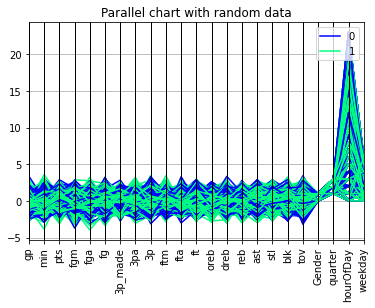

In \[167\]:

    # 5.2 Parallel coordinates with 'ad' data
    fig2 = plt.figure()
    ax = pd.plotting.parallel_coordinates(nc.drop('name',axis=1),
                                     'target_5yrs',
                                      colormap= plt.cm.winter
                                      )

    plt.xticks(rotation=90)
    plt.title("Parallel chart with ad data")

Out\[167\]:

    (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18]),
     [Text(0, 0, 'gp'),
      Text(1, 0, 'min'),
      Text(2, 0, 'pts'),
      Text(3, 0, 'fgm'),
      Text(4, 0, 'fga'),
      Text(5, 0, 'fg'),
      Text(6, 0, '3p_made'),
      Text(7, 0, '3pa'),
      Text(8, 0, '3p'),
      Text(9, 0, 'ftm'),
      Text(10, 0, 'fta'),
      Text(11, 0, 'ft'),
      Text(12, 0, 'oreb'),
      Text(13, 0, 'dreb'),
      Text(14, 0, 'reb'),
      Text(15, 0, 'ast'),
      Text(16, 0, 'stl'),
      Text(17, 0, 'blk'),
      Text(18, 0, 'tov')])

Out\[167\]:

    Text(0.5, 1.0, 'Parallel chart with ad data')

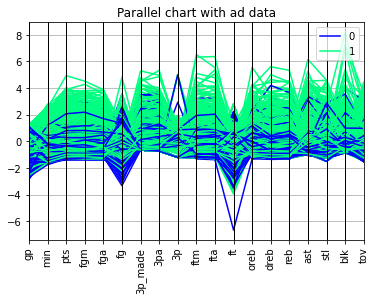

## Andrews plot<a href="#Andrews-plot" class="anchor-link">¶</a>

In \[168\]:

    # 6.0 Andrews charts with random data
    fig3 = plt.figure()
    pd.plotting.andrews_curves(nc_rand.drop('name',axis=1),
                               'target_5yrs',
                               colormap = 'winter')

    plt.title("Andrews plots with random data")

Out\[168\]:

    <AxesSubplot:>

Out\[168\]:

    Text(0.5, 1.0, 'Andrews plots with random data')

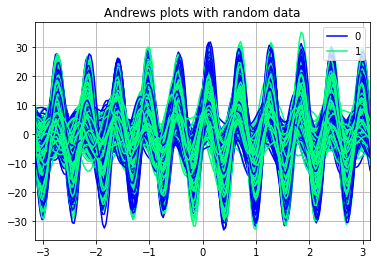

In \[170\]:

    # 6.1 Andrews plots with ad data
    fig4 = plt.figure()
    pd.plotting.andrews_curves(nc.drop('name',axis=1),
                               'target_5yrs',
                                colormap = plt.cm.winter
                               )
    plt.xticks(rotation=90)
    plt.title("Andrews curve with ad data")

Out\[170\]:

    <AxesSubplot:>

Out\[170\]:

    (array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
     [Text(0, 0, ''),
      Text(0, 0, ''),
      Text(0, 0, ''),
      Text(0, 0, ''),
      Text(0, 0, ''),
      Text(0, 0, ''),
      Text(0, 0, ''),
      Text(0, 0, ''),
      Text(0, 0, '')])

Out\[170\]:

    Text(0.5, 1.0, 'Andrews curve with ad data')

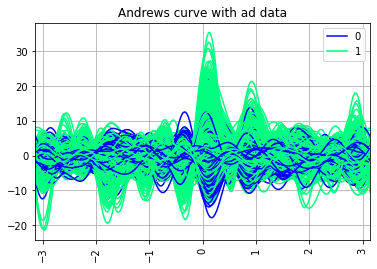

## Radviz plot<a href="#Radviz-plot" class="anchor-link">¶</a>

In \[172\]:

    # 7.0 Radviz plot
    # https://pandas.pydata.org/docs/reference/api/pandas.plotting.radviz.html

    fig5 = plt.figure()
    pd.plotting.radviz(nc.drop('name',axis=1),
                       class_column ='target_5yrs',
                       colormap= plt.cm.winter,
                       alpha = 0.4
                       )

Out\[172\]:

    <AxesSubplot:>

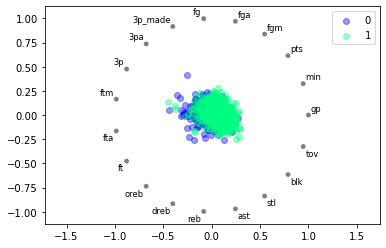

## t-sne<a href="#t-sne" class="anchor-link">¶</a>

In \[178\]:

    # See the power of t-sne
    #      (t-distributed Stochastic Neighbor Embedding)

    from sklearn.manifold import TSNE

In \[180\]:

    # Project all data but 'Clicked_on_ad' on two axis
    #        Also just replace nc with nc_rand and try again

    nc1=nc.drop('name',axis=1)

    X_embedded = TSNE(n_components=2).fit_transform(nc1.iloc[:,:-1])
    X_embedded.shape    # (1000,2), numpy array
    df = pd.DataFrame(X_embedded, columns=['X','Y'])

    # 11.5.2 No two plots will be the same
    sns.relplot(x = "X",
                y = "Y",
                hue = nc.target_5yrs,    # Colur each point as per 1 or 0
                data = df
                )

Out\[180\]:

    (1294, 2)

Out\[180\]:

    <seaborn.axisgrid.FacetGrid at 0x1d122ed5ac0>

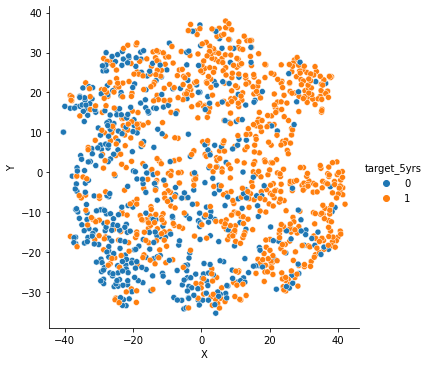

In \[183\]:

    # 8.1 Project all data but 'Clicked_on_ad' on two axis
    #        Also just replace nc with nc_rand and try again

    X_embedded = TSNE(n_components=2).fit_transform(nc1.iloc[:,:-1])
    X_embedded.shape    # (1000,2), numpy array
    df = pd.DataFrame(X_embedded, columns=['X','Y'])

    # 11.5.2 No two plots will be the same
    sns.relplot(x = "X",
                y = "Y",
                hue = nc_rand.target_5yrs,    # Colur each point as per 1 or 0
                data = df
                )

Out\[183\]:

    (1294, 2)

Out\[183\]:

    <seaborn.axisgrid.FacetGrid at 0x1d12ef4f070>

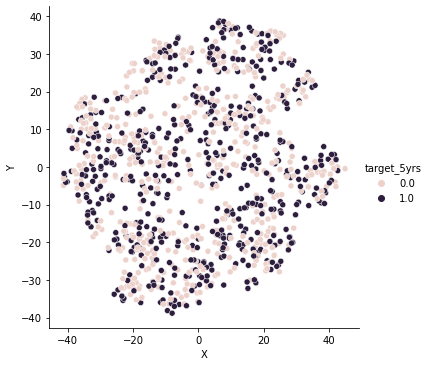

In \[185\]:

    import umap

In \[186\]:

    reducer = umap.UMAP()

In \[188\]:

    # 8.1 Project all data but 'Clicked_on_ad' on two axis
    #        Also just replace nc with nc_rand and try again

    X_embedded = umap.UMAP(n_neighbors=5,
                           min_dist=0.3,
                           metric='correlation').fit_transform(nc1.iloc[:,:-1])
    X_embedded.shape    # (1000,2), numpy array
    df = pd.DataFrame(X_embedded, columns=['X','Y'])

    # 11.5.2 No two plots will be the same
    sns.relplot(x = "X",
                y = "Y",
                hue = nc1.target_5yrs,    # Colur each point as per 1 or 0
                data = df
                )

Out\[188\]:

    (1294, 2)

Out\[188\]:

    <seaborn.axisgrid.FacetGrid at 0x1d138403d00>

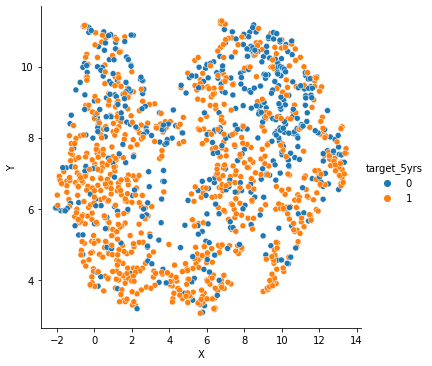

# Pipeline<a href="#Pipeline" class="anchor-link">¶</a>

In \[61\]:

    # Final pipe to bring in the column-transformer followed by estimator
    pt = Pipeline([ 
                    ('classifier', DecisionTreeClassifier())])

In \[62\]:

    # Fit final pipe on the data
    pt.fit(X_train,y_train)

Out\[62\]:

    Pipeline(steps=[('classifier', DecisionTreeClassifier())])

In \[63\]:

    df.head()

Out\[63\]:

|     | index | name | gp  | min  | pts | fgm | fga | fg   | 3p_made | 3pa | 3p   | ftm | fta | ft   | oreb | dreb | reb | ast | stl | blk | tov | target_5yrs |
|-----|-------|------|-----|------|-----|-----|-----|------|---------|-----|------|-----|-----|------|------|------|-----|-----|-----|-----|-----|-------------|
| 0   | 0     | 128  | 36  | 27.4 | 7.4 | 2.6 | 7.6 | 34.7 | 0.5     | 2.1 | 25.0 | 1.6 | 2.3 | 69.9 | 0.7  | 3.4  | 4.1 | 1.9 | 0.4 | 0.4 | 1.3 | 0           |
| 1   | 1     | 45   | 35  | 26.9 | 7.2 | 2.0 | 6.7 | 29.6 | 0.7     | 2.8 | 23.5 | 2.6 | 3.4 | 76.5 | 0.5  | 2.0  | 2.4 | 3.7 | 1.1 | 0.5 | 1.6 | 0           |
| 2   | 2     | 521  | 74  | 15.3 | 5.2 | 2.0 | 4.7 | 42.2 | 0.4     | 1.7 | 24.4 | 0.9 | 1.3 | 67.0 | 0.5  | 1.7  | 2.2 | 1.0 | 0.5 | 0.3 | 1.0 | 0           |
| 3   | 3     | 820  | 58  | 11.6 | 5.7 | 2.3 | 5.5 | 42.6 | 0.1     | 0.5 | 22.6 | 0.9 | 1.3 | 68.9 | 1.0  | 0.9  | 1.9 | 0.8 | 0.6 | 0.1 | 1.0 | 1           |
| 4   | 4     | 871  | 48  | 11.5 | 4.5 | 1.6 | 3.0 | 52.4 | 0.0     | 0.1 | 0.0  | 1.3 | 1.9 | 67.4 | 1.0  | 1.5  | 2.5 | 0.3 | 0.3 | 0.4 | 0.8 | 1           |

In \[64\]:

    # Make predictions
    pt.predict(X_train)

Out\[64\]:

    array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In \[65\]:

    set_config(display='diagram')
    pt

Out\[65\]:

Pipeline

    Pipeline(steps=[('classifier', DecisionTreeClassifier())])

DecisionTreeClassifier

    DecisionTreeClassifier()

In \[67\]:

    # splitting the data into train and test
    X_train,X_test, y_train, y_test = train_test_split(
                                                        X_train,                   # Data features
                                                        y_train,                   # Target column
                                                        test_size = 0.35,     # split-ratio
                                                        shuffle=True    
                                                        )

In \[74\]:

    pip install xgboost

    Note: you may need to restart the kernel to use updated packages.

    'C:\Users\user\Downloads\New' is not recognized as an internal or external command,
    operable program or batch file.

In \[75\]:

    from sklearn.decomposition import PCA
    from xgboost.sklearn import XGBClassifier

In \[76\]:

    # Pipeline steps
    # steps: List of (name, transform) tuples
    #       (implementing fit/transform) that are
    #       chained, in the order in which they
    #       are chained, with the last object an
    #       estimator.
    #      Format: [(name, transformer), (name, transformer)..(name, estimator)]

    steps_xg = [('sts', ss() ),
                ('pca', PCA()),
                ('xg',  XGBClassifier(silent = False,
                                      n_jobs=2)
                                                                      # Specify other parameters here
                )
                ]

    # Instantiate Pipeline object

    pipe_xg = Pipeline(steps_xg)

In \[77\]:

    # 6.2 What parameters in the pipe are available for tuning

    print("\n\n--Which parameters can be tuned?--\n\n")
    pipe_xg.get_params()


    --Which parameters can be tuned?--

Out\[77\]:

    {'memory': None,
     'steps': [('sts', StandardScaler()),
      ('pca', PCA()),
      ('xg',
       XGBClassifier(base_score=None, booster=None, callbacks=None,
                     colsample_bylevel=None, colsample_bynode=None,
                     colsample_bytree=None, early_stopping_rounds=None,
                     enable_categorical=False, eval_metric=None, gamma=None,
                     gpu_id=None, grow_policy=None, importance_type=None,
                     interaction_constraints=None, learning_rate=None, max_bin=None,
                     max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                     max_leaves=None, min_child_weight=None, missing=nan,
                     monotone_constraints=None, n_estimators=100, n_jobs=2,
                     num_parallel_tree=None, predictor=None, random_state=None,
                     reg_alpha=None, reg_lambda=None, ...))],
     'verbose': False,
     'sts': StandardScaler(),
     'pca': PCA(),
     'xg': XGBClassifier(base_score=None, booster=None, callbacks=None,
                   colsample_bylevel=None, colsample_bynode=None,
                   colsample_bytree=None, early_stopping_rounds=None,
                   enable_categorical=False, eval_metric=None, gamma=None,
                   gpu_id=None, grow_policy=None, importance_type=None,
                   interaction_constraints=None, learning_rate=None, max_bin=None,
                   max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                   max_leaves=None, min_child_weight=None, missing=nan,
                   monotone_constraints=None, n_estimators=100, n_jobs=2,
                   num_parallel_tree=None, predictor=None, random_state=None,
                   reg_alpha=None, reg_lambda=None, ...),
     'sts__copy': True,
     'sts__with_mean': True,
     'sts__with_std': True,
     'pca__copy': True,
     'pca__iterated_power': 'auto',
     'pca__n_components': None,
     'pca__random_state': None,
     'pca__svd_solver': 'auto',
     'pca__tol': 0.0,
     'pca__whiten': False,
     'xg__objective': 'binary:logistic',
     'xg__use_label_encoder': False,
     'xg__base_score': None,
     'xg__booster': None,
     'xg__callbacks': None,
     'xg__colsample_bylevel': None,
     'xg__colsample_bynode': None,
     'xg__colsample_bytree': None,
     'xg__early_stopping_rounds': None,
     'xg__enable_categorical': False,
     'xg__eval_metric': None,
     'xg__gamma': None,
     'xg__gpu_id': None,
     'xg__grow_policy': None,
     'xg__importance_type': None,
     'xg__interaction_constraints': None,
     'xg__learning_rate': None,
     'xg__max_bin': None,
     'xg__max_cat_to_onehot': None,
     'xg__max_delta_step': None,
     'xg__max_depth': None,
     'xg__max_leaves': None,
     'xg__min_child_weight': None,
     'xg__missing': nan,
     'xg__monotone_constraints': None,
     'xg__n_estimators': 100,
     'xg__n_jobs': 2,
     'xg__num_parallel_tree': None,
     'xg__predictor': None,
     'xg__random_state': None,
     'xg__reg_alpha': None,
     'xg__reg_lambda': None,
     'xg__sampling_method': None,
     'xg__scale_pos_weight': None,
     'xg__subsample': None,
     'xg__tree_method': None,
     'xg__validate_parameters': None,
     'xg__verbosity': None,
     'xg__silent': False}

# Cross Validation<a href="#Cross-Validation" class="anchor-link">¶</a>

In \[80\]:

    import numpy as np
    import pandas as pd


    # 1.2 Data pre-processing
    #     z = (x-mean)/stdev
    from sklearn.preprocessing import StandardScaler as ss

    # 1.3 Dimensionality reduction and noise removal
    from sklearn.decomposition import PCA

    # 1.4 Data splitting and model parameter search
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import StratifiedKFold

    # 1.5 Model pipelining
    from sklearn.pipeline import Pipeline
    from sklearn.pipeline import make_pipeline

    # 1.6 Hyperparameter optimization
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV

    # 1.7.1
    #     pip install scikit-optimize
    #     pip install 'scikit-optimize[plots]'
    #     Refer: https://github.com/scikit-optimize/scikit-optimize
    #     conda install -c conda-forge scikit-optimize
    from skopt import BayesSearchCV 
    from skopt.space import Real, Categorical, Integer

    # 1.8 Modeling modules
    #     Call sklearn wrapper of xgboost
    # """Scikit-Learn Wrapper interface for XGBoost."""
    #  """Implementation of the Scikit-Learn API for XGBoost.
    # https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
    # Stackoverflow:
    # https://stackoverflow.com/a/34696477
    # https://stackoverflow.com/a/46947191
    # Install as: conda install -c anaconda py-xgboost
    from xgboost.sklearn import XGBClassifier

    # 1.9 Model evaluation metrics
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.metrics import plot_roc_curve
    from sklearn.metrics import confusion_matrix

    # 1.10
    import matplotlib.pyplot as plt
    import seaborn as sns
    from xgboost import plot_importance

    # 1.11 Permutation feature importance
    from sklearn.inspection import permutation_importance

    # 1.12 Misc
    import time
    import os
    import gc
    import random

    # 1.13 Used in Randomized parameter search
    from scipy.stats import uniform

    # 1.14
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = "all"

    # 1.15 Set option to dislay many rows
    pd.set_option('display.max_columns', 100)

# Hyperparameter tuning both using Grid Search and Randomized Search<a href="#Hyperparameter-tuning-both-using-Grid-Search-and-Randomized-Search" class="anchor-link">¶</a>

In \[81\]:

    print("\n\n--Which parameters can be tuned?--\n\n")
    pipe_xg.get_params()


    --Which parameters can be tuned?--

Out\[81\]:

    {'memory': None,
     'steps': [('sts', StandardScaler()),
      ('pca', PCA()),
      ('xg',
       XGBClassifier(base_score=None, booster=None, callbacks=None,
                     colsample_bylevel=None, colsample_bynode=None,
                     colsample_bytree=None, early_stopping_rounds=None,
                     enable_categorical=False, eval_metric=None, gamma=None,
                     gpu_id=None, grow_policy=None, importance_type=None,
                     interaction_constraints=None, learning_rate=None, max_bin=None,
                     max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                     max_leaves=None, min_child_weight=None, missing=nan,
                     monotone_constraints=None, n_estimators=100, n_jobs=2,
                     num_parallel_tree=None, predictor=None, random_state=None,
                     reg_alpha=None, reg_lambda=None, ...))],
     'verbose': False,
     'sts': StandardScaler(),
     'pca': PCA(),
     'xg': XGBClassifier(base_score=None, booster=None, callbacks=None,
                   colsample_bylevel=None, colsample_bynode=None,
                   colsample_bytree=None, early_stopping_rounds=None,
                   enable_categorical=False, eval_metric=None, gamma=None,
                   gpu_id=None, grow_policy=None, importance_type=None,
                   interaction_constraints=None, learning_rate=None, max_bin=None,
                   max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                   max_leaves=None, min_child_weight=None, missing=nan,
                   monotone_constraints=None, n_estimators=100, n_jobs=2,
                   num_parallel_tree=None, predictor=None, random_state=None,
                   reg_alpha=None, reg_lambda=None, ...),
     'sts__copy': True,
     'sts__with_mean': True,
     'sts__with_std': True,
     'pca__copy': True,
     'pca__iterated_power': 'auto',
     'pca__n_components': None,
     'pca__random_state': None,
     'pca__svd_solver': 'auto',
     'pca__tol': 0.0,
     'pca__whiten': False,
     'xg__objective': 'binary:logistic',
     'xg__use_label_encoder': False,
     'xg__base_score': None,
     'xg__booster': None,
     'xg__callbacks': None,
     'xg__colsample_bylevel': None,
     'xg__colsample_bynode': None,
     'xg__colsample_bytree': None,
     'xg__early_stopping_rounds': None,
     'xg__enable_categorical': False,
     'xg__eval_metric': None,
     'xg__gamma': None,
     'xg__gpu_id': None,
     'xg__grow_policy': None,
     'xg__importance_type': None,
     'xg__interaction_constraints': None,
     'xg__learning_rate': None,
     'xg__max_bin': None,
     'xg__max_cat_to_onehot': None,
     'xg__max_delta_step': None,
     'xg__max_depth': None,
     'xg__max_leaves': None,
     'xg__min_child_weight': None,
     'xg__missing': nan,
     'xg__monotone_constraints': None,
     'xg__n_estimators': 100,
     'xg__n_jobs': 2,
     'xg__num_parallel_tree': None,
     'xg__predictor': None,
     'xg__random_state': None,
     'xg__reg_alpha': None,
     'xg__reg_lambda': None,
     'xg__sampling_method': None,
     'xg__scale_pos_weight': None,
     'xg__subsample': None,
     'xg__tree_method': None,
     'xg__validate_parameters': None,
     'xg__verbosity': None,
     'xg__silent': False}

In \[82\]:

    # 6.3 Define dictionary
    parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                      #  of error is to be fitted by
                                                      #   by next boosted tree.
                                                      # See this answer in stackoverflow:
                                                      # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                      # Coefficients of boosted trees decide,
                                                      #  in the overall model or scheme, how much importance
                                                      #   each boosted tree shall have. Values of these
                                                      #    Coefficients are calculated by modeling
                                                      #     algorithm and unlike learning rate are
                                                      #      not hyperparameters. These Coefficients
                                                      #       get adjusted by l1 and l2 parameters
                  'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                      # l1 and l2 specifications will change
                                                      # the values of coeff of boosted trees
                                                      # but not their numbers

                  'xg__max_depth':      [4,6],
                  'pca__n_components' : [25,30],
                  'xg__booster': ['gbtree','gblinear']
                  }                               # Total: 2 * 2 * 2 * 2

In \[86\]:

    # 6.3.1 Define revised dictionary
    #       This takes 3.5 minutes
    parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                      #  of error is to be fitted by
                                                      #   by next boosted tree.
                                                      # See this answer in stackoverflow:
                                                      # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                      # Coefficients of boosted trees decide,
                                                      #  in the overall model or scheme, how much importance
                                                      #   each boosted tree shall have. Values of these
                                                      #    Coefficients are calculated by modeling
                                                      #     algorithm and unlike learning rate are
                                                      #      not hyperparameters. These Coefficients
                                                      #       get adjusted by l1 and l2 parameters
                   'xg__max_depth':      [4,6],
     
                  'pca__n_components' : [15,20],
                   }                               # Total: 2 * 2 * 2 * 2

In \[87\]:

    # 7  Grid Search (16 * 2) iterations
    #    Create Grid Search object first with all necessary
    #    specifications. Note that data, X, as yet is not specified

    #    Data Leakage and pipelining:
    #    Pipeline avoids data leakage during GridSearch
    #    See this: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

    clf = GridSearchCV(pipe_xg,            # pipeline object
                       parameters,         # possible parameters
                       n_jobs = 2,         # USe parallel cpu threads
                       cv =2 ,             # No of folds
                       verbose =1,         # Higher the value, more the verbosity
                       scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                       refit = 'roc_auc'   # Refitting final model on what parameters?
                                           # Those which maximise auc
                       )

In \[88\]:

    #Start fitting pipeline to data
    print("\n\n--Takes time...---\n")
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print()
    (end - start)/60 


    --Takes time...---

    Fitting 2 folds for each of 8 candidates, totalling 16 fits
    [00:47:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
    Parameters: { "silent" } might not be used.

      This could be a false alarm, with some parameters getting used by language bindings but
      then being mistakenly passed down to XGBoost core, or some parameter actually being used
      but getting flagged wrongly here. Please open an issue if you find any such cases.

Out\[88\]:

GridSearchCV

    GridSearchCV(cv=2,
                 estimator=Pipeline(steps=[('sts', StandardScaler()),
                                           ('pca', PCA()),
                                           ('xg',
                                            XGBClassifier(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                                          colsample_bytree=None,
                                                          early_stopping_rounds=None,
                                                          enable_categorical=False,
                                                          eval_metric=None,
                                                          gamma=None, gpu_id=None,
                                                          grow_policy=None,
                                                          importance_type=None,
                                                          intera...
                                                          max_leaves=None,
                                                          min_child_weight=None,
                                                          missing=nan,
                                                          monotone_constraints=None,
                                                          n_estimators=100,
                                                          n_jobs=2,
                                                          num_parallel_tree=None,
                                                          predictor=None,
                                                          random_state=None,
                                                          reg_alpha=None,
                                                          reg_lambda=None, ...))]),
                 n_jobs=2,
                 param_grid={'pca__n_components': [15, 20],
                             'xg__learning_rate': [0.03, 0.05],
                             'xg__max_depth': [4, 6]},
                 refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

StandardScaler

    StandardScaler()

PCA

    PCA()

XGBClassifier

    XGBClassifier(base_score=None, booster=None, callbacks=None,
                  colsample_bylevel=None, colsample_bynode=None,
                  colsample_bytree=None, early_stopping_rounds=None,
                  enable_categorical=False, eval_metric=None, gamma=None,
                  gpu_id=None, grow_policy=None, importance_type=None,
                  interaction_constraints=None, learning_rate=None, max_bin=None,
                  max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                  max_leaves=None, min_child_weight=None, missing=nan,
                  monotone_constraints=None, n_estimators=100, n_jobs=2,
                  num_parallel_tree=None, predictor=None, random_state=None,
                  reg_alpha=None, reg_lambda=None, ...)

Out\[88\]:

    0.04954229990641276

# Cross Validation<a href="#Cross-Validation" class="anchor-link">¶</a>

In \[91\]:

    import numpy as np
    import pandas as pd


    # 1.2 Data pre-processing
    #     z = (x-mean)/stdev
    from sklearn.preprocessing import StandardScaler as ss

    # 1.3 Dimensionality reduction and noise removal
    from sklearn.decomposition import PCA

    # 1.4 Data splitting and model parameter search
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import StratifiedKFold

    # 1.5 Model pipelining
    from sklearn.pipeline import Pipeline
    from sklearn.pipeline import make_pipeline

    # 1.6 Hyperparameter optimization
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import RandomizedSearchCV

    # 1.7.1
    #     pip install scikit-optimize
    #     pip install 'scikit-optimize[plots]'
    #     Refer: https://github.com/scikit-optimize/scikit-optimize
    #     conda install -c conda-forge scikit-optimize
    from skopt import BayesSearchCV 
    from skopt.space import Real, Categorical, Integer

    # 1.8 Modeling modules
    #     Call sklearn wrapper of xgboost
    # """Scikit-Learn Wrapper interface for XGBoost."""
    #  """Implementation of the Scikit-Learn API for XGBoost.
    # https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
    # Stackoverflow:
    # https://stackoverflow.com/a/34696477
    # https://stackoverflow.com/a/46947191
    # Install as: conda install -c anaconda py-xgboost
    from xgboost.sklearn import XGBClassifier

    # 1.9 Model evaluation metrics
    from sklearn.metrics import accuracy_score, f1_score
    from sklearn.metrics import plot_roc_curve
    from sklearn.metrics import confusion_matrix

    # 1.10
    import matplotlib.pyplot as plt
    import seaborn as sns
    from xgboost import plot_importance

    # 1.11 Permutation feature importance
    from sklearn.inspection import permutation_importance

    # 1.12 Misc
    import time
    import os
    import gc
    import random

    # 1.13 Used in Randomized parameter search
    from scipy.stats import uniform

    # 1.14
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = "all"

    # 1.15 Set option to dislay many rows
    pd.set_option('display.max_columns', 100)

    # Hyperparameter tuning both using Grid Search and Randomized Search

    print("\n\n--Which parameters can be tuned?--\n\n")
    pipe_xg.get_params()

    # 6.3 Define dictionary
    parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                      #  of error is to be fitted by
                                                      #   by next boosted tree.
                                                      # See this answer in stackoverflow:
                                                      # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                      # Coefficients of boosted trees decide,
                                                      #  in the overall model or scheme, how much importance
                                                      #   each boosted tree shall have. Values of these
                                                      #    Coefficients are calculated by modeling
                                                      #     algorithm and unlike learning rate are
                                                      #      not hyperparameters. These Coefficients
                                                      #       get adjusted by l1 and l2 parameters
                  'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                      # l1 and l2 specifications will change
                                                      # the values of coeff of boosted trees
                                                      # but not their numbers

                  'xg__max_depth':      [4,6],
                  'pca__n_components' : [15,20],
                  'xg__booster': ['gbtree','gblinear']
                  }                               # Total: 2 * 2 * 2 * 2

    # 6.3.1 Define revised dictionary
    #       This takes 3.5 minutes
    parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                      #  of error is to be fitted by
                                                      #   by next boosted tree.
                                                      # See this answer in stackoverflow:
                                                      # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                      # Coefficients of boosted trees decide,
                                                      #  in the overall model or scheme, how much importance
                                                      #   each boosted tree shall have. Values of these
                                                      #    Coefficients are calculated by modeling
                                                      #     algorithm and unlike learning rate are
                                                      #      not hyperparameters. These Coefficients
                                                      #       get adjusted by l1 and l2 parameters
                   'xg__max_depth':      [4,6],
     
                  'pca__n_components' : [15,20],
                   }                               # Total: 2 * 2 * 2 * 2

    # 7  Grid Search (16 * 2) iterations
    #    Create Grid Search object first with all necessary
    #    specifications. Note that data, X, as yet is not specified

    #    Data Leakage and pipelining:
    #    Pipeline avoids data leakage during GridSearch
    #    See this: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

    clf = GridSearchCV(pipe_xg,            # pipeline object
                       parameters,         # possible parameters
                       n_jobs = 2,         # USe parallel cpu threads
                       cv =2 ,             # No of folds
                       verbose =1,         # Higher the value, more the verbosity
                       scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                       refit = 'roc_auc'   # Refitting final model on what parameters?
                                           # Those which maximise auc
                       )

    #Start fitting pipeline to data
    print("\n\n--Takes time...---\n")
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print()
    (end - start)/60 


    --Which parameters can be tuned?--

Out\[91\]:

    {'memory': None,
     'steps': [('sts', StandardScaler()),
      ('pca', PCA()),
      ('xg',
       XGBClassifier(base_score=None, booster=None, callbacks=None,
                     colsample_bylevel=None, colsample_bynode=None,
                     colsample_bytree=None, early_stopping_rounds=None,
                     enable_categorical=False, eval_metric=None, gamma=None,
                     gpu_id=None, grow_policy=None, importance_type=None,
                     interaction_constraints=None, learning_rate=None, max_bin=None,
                     max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                     max_leaves=None, min_child_weight=None, missing=nan,
                     monotone_constraints=None, n_estimators=100, n_jobs=2,
                     num_parallel_tree=None, predictor=None, random_state=None,
                     reg_alpha=None, reg_lambda=None, ...))],
     'verbose': False,
     'sts': StandardScaler(),
     'pca': PCA(),
     'xg': XGBClassifier(base_score=None, booster=None, callbacks=None,
                   colsample_bylevel=None, colsample_bynode=None,
                   colsample_bytree=None, early_stopping_rounds=None,
                   enable_categorical=False, eval_metric=None, gamma=None,
                   gpu_id=None, grow_policy=None, importance_type=None,
                   interaction_constraints=None, learning_rate=None, max_bin=None,
                   max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                   max_leaves=None, min_child_weight=None, missing=nan,
                   monotone_constraints=None, n_estimators=100, n_jobs=2,
                   num_parallel_tree=None, predictor=None, random_state=None,
                   reg_alpha=None, reg_lambda=None, ...),
     'sts__copy': True,
     'sts__with_mean': True,
     'sts__with_std': True,
     'pca__copy': True,
     'pca__iterated_power': 'auto',
     'pca__n_components': None,
     'pca__random_state': None,
     'pca__svd_solver': 'auto',
     'pca__tol': 0.0,
     'pca__whiten': False,
     'xg__objective': 'binary:logistic',
     'xg__use_label_encoder': False,
     'xg__base_score': None,
     'xg__booster': None,
     'xg__callbacks': None,
     'xg__colsample_bylevel': None,
     'xg__colsample_bynode': None,
     'xg__colsample_bytree': None,
     'xg__early_stopping_rounds': None,
     'xg__enable_categorical': False,
     'xg__eval_metric': None,
     'xg__gamma': None,
     'xg__gpu_id': None,
     'xg__grow_policy': None,
     'xg__importance_type': None,
     'xg__interaction_constraints': None,
     'xg__learning_rate': None,
     'xg__max_bin': None,
     'xg__max_cat_to_onehot': None,
     'xg__max_delta_step': None,
     'xg__max_depth': None,
     'xg__max_leaves': None,
     'xg__min_child_weight': None,
     'xg__missing': nan,
     'xg__monotone_constraints': None,
     'xg__n_estimators': 100,
     'xg__n_jobs': 2,
     'xg__num_parallel_tree': None,
     'xg__predictor': None,
     'xg__random_state': None,
     'xg__reg_alpha': None,
     'xg__reg_lambda': None,
     'xg__sampling_method': None,
     'xg__scale_pos_weight': None,
     'xg__subsample': None,
     'xg__tree_method': None,
     'xg__validate_parameters': None,
     'xg__verbosity': None,
     'xg__silent': False}


    --Takes time...---

    Fitting 2 folds for each of 8 candidates, totalling 16 fits
    [00:49:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
    Parameters: { "silent" } might not be used.

      This could be a false alarm, with some parameters getting used by language bindings but
      then being mistakenly passed down to XGBoost core, or some parameter actually being used
      but getting flagged wrongly here. Please open an issue if you find any such cases.

Out\[91\]:

GridSearchCV

    GridSearchCV(cv=2,
                 estimator=Pipeline(steps=[('sts', StandardScaler()),
                                           ('pca', PCA()),
                                           ('xg',
                                            XGBClassifier(base_score=None,
                                                          booster=None,
                                                          callbacks=None,
                                                          colsample_bylevel=None,
                                                          colsample_bynode=None,
                                                          colsample_bytree=None,
                                                          early_stopping_rounds=None,
                                                          enable_categorical=False,
                                                          eval_metric=None,
                                                          gamma=None, gpu_id=None,
                                                          grow_policy=None,
                                                          importance_type=None,
                                                          intera...
                                                          max_leaves=None,
                                                          min_child_weight=None,
                                                          missing=nan,
                                                          monotone_constraints=None,
                                                          n_estimators=100,
                                                          n_jobs=2,
                                                          num_parallel_tree=None,
                                                          predictor=None,
                                                          random_state=None,
                                                          reg_alpha=None,
                                                          reg_lambda=None, ...))]),
                 n_jobs=2,
                 param_grid={'pca__n_components': [15, 20],
                             'xg__learning_rate': [0.03, 0.05],
                             'xg__max_depth': [4, 6]},
                 refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

StandardScaler

    StandardScaler()

PCA

    PCA()

XGBClassifier

    XGBClassifier(base_score=None, booster=None, callbacks=None,
                  colsample_bylevel=None, colsample_bynode=None,
                  colsample_bytree=None, early_stopping_rounds=None,
                  enable_categorical=False, eval_metric=None, gamma=None,
                  gpu_id=None, grow_policy=None, importance_type=None,
                  interaction_constraints=None, learning_rate=None, max_bin=None,
                  max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                  max_leaves=None, min_child_weight=None, missing=nan,
                  monotone_constraints=None, n_estimators=100, n_jobs=2,
                  num_parallel_tree=None, predictor=None, random_state=None,
                  reg_alpha=None, reg_lambda=None, ...)

Out\[91\]:

    0.029617063204447427

In \[92\]:

    from sklearn.model_selection import cross_val_score,KFold
    from sklearn.linear_model import LogisticRegression

    X=X_train
    Y=y_train
    logreg=LogisticRegression()
    kf=KFold(n_splits=5)
    score=cross_val_score(logreg,X,Y,cv=kf)
    print("Cross Validation Scores are {}".format(score))
    print("Average Cross Validation score :{}".format(score.mean()))

    C:\Users\user\Downloads\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

    Increase the number of iterations (max_iter) or scale the data as shown in:
        https://scikit-learn.org/stable/modules/preprocessing.html
    Please also refer to the documentation for alternative solver options:
        https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
      n_iter_i = _check_optimize_result(
    C:\Users\user\Downloads\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

    Increase the number of iterations (max_iter) or scale the data as shown in:
        https://scikit-learn.org/stable/modules/preprocessing.html
    Please also refer to the documentation for alternative solver options:
        https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
      n_iter_i = _check_optimize_result(
    C:\Users\user\Downloads\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

    Increase the number of iterations (max_iter) or scale the data as shown in:
        https://scikit-learn.org/stable/modules/preprocessing.html
    Please also refer to the documentation for alternative solver options:
        https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
      n_iter_i = _check_optimize_result(
    C:\Users\user\Downloads\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

    Increase the number of iterations (max_iter) or scale the data as shown in:
        https://scikit-learn.org/stable/modules/preprocessing.html
    Please also refer to the documentation for alternative solver options:
        https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
      n_iter_i = _check_optimize_result(
    C:\Users\user\Downloads\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

    Increase the number of iterations (max_iter) or scale the data as shown in:
        https://scikit-learn.org/stable/modules/preprocessing.html
    Please also refer to the documentation for alternative solver options:
        https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
      n_iter_i = _check_optimize_result(

    Cross Validation Scores are [0.68047337 0.69642857 0.73809524 0.7202381  0.73214286]
    Average Cross Validation score :0.7134756269371654

In \[ \]: